In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_csv():
    csv_file_path = "final_restaurant_data.csv"
    return pd.read_csv(os.path.join('./data', csv_file_path), encoding='cp949')


df = load_csv()

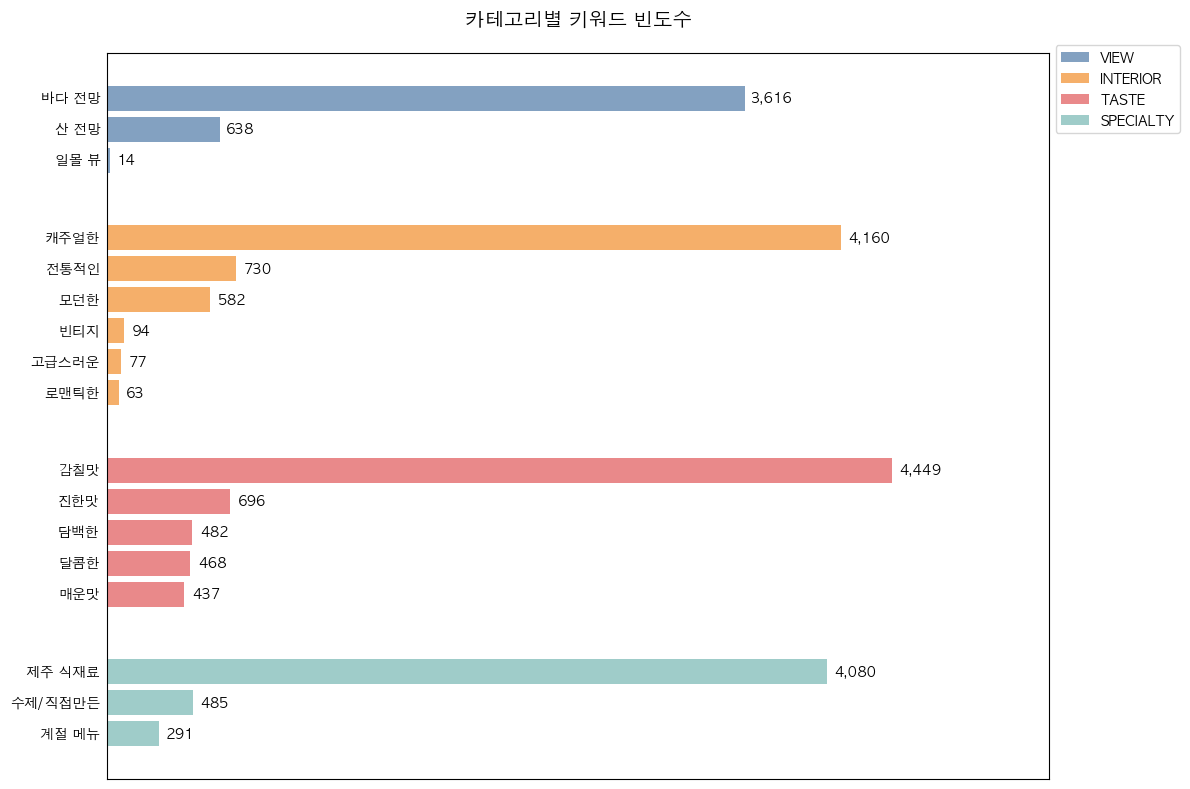

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='AppleGothic') #맥북전용임 ㅜ
plt.rcParams['axes.unicode_minus'] = False  

def plot_keyword_frequency():
    categories = ['VIEW', 'INTERIOR', 'TASTE', 'SPECIALTY']
    colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2']
    
    plt.figure(figsize=(12, 8))
    current_pos = 0
    
    for idx, category in enumerate(categories):
        values = df[category].value_counts()
        values = values[values.index != '-']
        
        bars = plt.barh([i + current_pos for i in range(len(values))], 
                       values.values,
                       color=colors[idx],
                       alpha=0.7,
                       label=category)
        
        for i, (keyword, count) in enumerate(values.items()):
            plt.text(count + max(values.values)*0.01,
                    i + current_pos, 
                    f'{count:,}', 
                    va='center',
                    fontsize=10)
            
            plt.text(-max(values.values)*0.01,
                    i + current_pos,
                    f'{keyword}',
                    ha='right',
                    va='center',
                    fontsize=10)
        
        current_pos += len(values) + 1.5
    
    plt.title('카테고리별 키워드 빈도수', pad=20, fontsize=14)
    plt.xlabel('')
    plt.gca().set_yticks([])
    plt.gca().set_xticks([])
    plt.legend(bbox_to_anchor=(1.0, 1.02), loc='upper left')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.margins(x=0.2)
    plt.tight_layout()
    plt.show()

# 함수 실행
plot_keyword_frequency()

In [11]:
def analyze_restaurant_keywords():
   # 각 식당별 카테고리 키워드 수를 계산
   def count_category_keywords(row):
       result = {}
       categories = ['VIEW', 'INTERIOR', 'TASTE', 'SPECIALTY']
       
       # 각 카테고리별 유효한 키워드 수 계산 ('-' 제외)
       for category in categories:
           result[f'{category}_COUNT'] = 0 if row[category] == '-' else 1
           
       # 전체 키워드 수 계산
       result['TOTAL_KEYWORDS'] = sum(result.values())
       
       return pd.Series(result)

   # 키워드 수 계산
   keyword_counts = df.apply(count_category_keywords, axis=1)
   
   # 원본 데이터와 키워드 수 데이터 합치기
   result_df = pd.concat([df[['MCT_NM', 'VIEW', 'INTERIOR', 'TASTE', 'SPECIALTY']], 
                         keyword_counts], axis=1)
   
   # 결과 저장
   result_df.to_csv('./data/restaurant_keyword_counts.csv', index=False, encoding='cp949')
   
   
   print("\n카테고리별 키워드 보유 통계:")
   for category in ['VIEW', 'INTERIOR', 'TASTE', 'SPECIALTY']:
       count = result_df[f'{category}_COUNT'].sum()
       total = len(result_df)
       print(f"{category}: {count}개 식당 ({count/total*100:.1f}%)")
   
   print("\n전체 키워드 수 분포:")
   print(result_df['TOTAL_KEYWORDS'].value_counts().sort_index())
   
   return result_df

# 함수 실행
keyword_analysis = analyze_restaurant_keywords()


=== 식당별 키워드 보유 현황 ===
    MCT_NM   VIEW INTERIOR TASTE SPECIALTY  VIEW_COUNT  INTERIOR_COUNT  \
0   팔도민박횟집      -        -     -    제주 식재료           0               0   
1  철가방을든해녀      -        -     -         -           0               0   
2  해녀삼대할망네  바다 전망     캐주얼한   감칠맛    제주 식재료           1               1   
3    서바당횟집  바다 전망     캐주얼한   감칠맛    제주 식재료           1               1   
4   마라도짜장면  바다 전망     캐주얼한   매운맛         -           1               1   

   TASTE_COUNT  SPECIALTY_COUNT  TOTAL_KEYWORDS  
0            0                1               1  
1            0                0               0  
2            1                1               4  
3            1                1               4  
4            1                0               3  

카테고리별 키워드 보유 통계:
VIEW: 4268개 식당 (45.7%)
INTERIOR: 5706개 식당 (61.1%)
TASTE: 6532개 식당 (70.0%)
SPECIALTY: 4856개 식당 (52.0%)

전체 키워드 수 분포:
TOTAL_KEYWORDS
0    1123
1    1301
2    3389
3     801
4    2720
Name: count, dtype: int64
